In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1) Dataset 

Pour créer la dataset, nous allons utiliser le module sklearn et sa méthode make_regression(int, int, int) qui prend 3 paramètres (n_samples, n_features, noise)


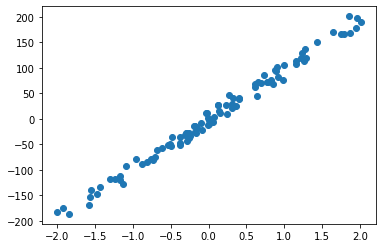

In [5]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
# Pour observer le tableau ainsi créé nous utilisons matplotlib et une de ses méthode scatter()
plt.scatter(x, y)

Rappel: Vérifier les dimensions des matrices

In [8]:
print(x.shape)
# Lors du 1er affichage de y nous avions une dimension non préciser nativement suite à la méthode sklearn
# Il est important de redimensionner la variable y pour éviter des erreurs de calcule. 
# la méthode reshape() permet de redimensionner la variable Y 
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [10]:
# Créer la matrice X grace à la méthode numpy hstack().
# La méthode hstack() permet de "collé" ensemble 2 vecteurs numpy a côté de l'autre
# x = (vecteur(x), vecteur(1)==len(x.shape)) 
X = np.hstack((x, np.ones(x.shape)))
X

array([[-0.31755523,  1.        ],
       [-0.1493113 ,  1.        ],
       [ 1.15608946,  1.        ],
       [-0.08053479,  1.        ],
       [-0.49054573,  1.        ],
       [-0.504165  ,  1.        ],
       [ 0.89495659,  1.        ],
       [ 1.94552466,  1.        ],
       [-0.02250399,  1.        ],
       [-0.48692932,  1.        ],
       [ 1.23610818,  1.        ],
       [-0.16344396,  1.        ],
       [-0.87620228,  1.        ],
       [ 1.28963579,  1.        ],
       [ 1.22630931,  1.        ],
       [-0.10334827,  1.        ],
       [ 1.86584098,  1.        ],
       [ 0.1394503 ,  1.        ],
       [-1.16718309,  1.        ],
       [-1.47613183,  1.        ],
       [ 0.90883302,  1.        ],
       [ 1.00203609,  1.        ],
       [-1.57012616,  1.        ],
       [-1.1708511 ,  1.        ],
       [ 0.36227428,  1.        ],
       [-0.95856516,  1.        ],
       [-0.00714669,  1.        ],
       [ 2.01726129,  1.        ],
       [-0.37809061,

In [14]:
# Initialiser le vecteur θ (thêta) avec des paramètres aléatoires
theta = np.random.randn(2, 1)
print(theta.shape)
print(theta)

(2, 1)
[[-0.72253319]
 [-0.32046289]]


# 2) Modèle Linéaire

In [15]:
# fonction F(x) = X.θ 
def model(X, theta):
    return X.dot(theta)

# 3) Fonction coût

In [19]:
def cost_function(X, y, theta):
    # m est égale à la longueur du vecteur Y
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [20]:
cost_function(X, y, theta)

4381.787230955404

# 4) Descente de Gradient

In [21]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [42]:
# Algorithme de la descente de gradient 
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# 5) Entraînement du modèle

In [80]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [81]:
theta_final

array([[97.38729897],
       [-0.64424096]])

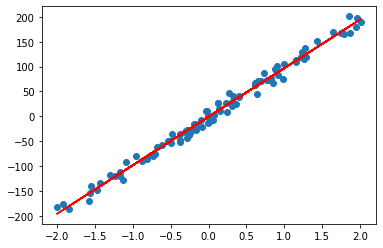

In [82]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c="r")

# Résultat

Comme nous pouvons le constater le résultat n'est pas encore optimal.
Pour améliorer la machine nous pouvons changer la valeur de l'hyperparamètre initialement à 0.001 et/ou augmenter le nombre d'itérations de la machine afin de lui laissé plus de temps pour apprendre le meilleur modèle.

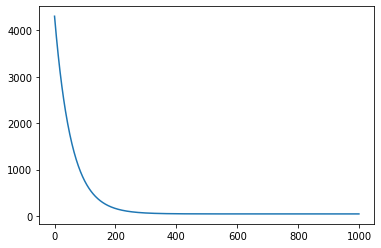

In [83]:
plt.plot(range(1000), cost_history)

# 6) Coefficient de détermination

In [84]:
def coef_determination(y, pred):
    # le résidu de la somme des carrés
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    resultat = round(((1 - u/v)* 100))
    return str(resultat) + '%'

In [85]:
coef_determination(y, predictions)

'99%'